In [1]:
import numpy as np 
import pandas as pd
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras
from keras import callbacks
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import os

# load data

In [2]:
data_path = 'dataset/CK+48'
data_dir_list = os.listdir(data_path)

img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-anger

Loaded the images of dataset-contempt

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-happy

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise



(981, 48, 48, 3)

# adding labels

In [3]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0     #135
labels[135:188]=1   #54
labels[189:365]=2   #177
labels[366:440]=3   #75
labels[441:647]=4   #207
labels[648:731]=5   #84
labels[732:980]=6   #249

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

# dividing into training and testing

In [4]:
Y = np_utils.to_categorical(labels, num_classes)

# x,y = shuffle(img_data,Y, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.30, shuffle=True, random_state=42)
# x_test = X_test

print(Y.shape)
print(X_train.shape)
print(X_test.shape)

(981, 7)
(686, 48, 48, 3)
(295, 48, 48, 3)


# creating model

In [5]:
input_shape=(48,48,3)

model = Sequential()
model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# model = Sequential()

# model.add(Conv2D(32, (3, 3), input_shape=(48,48,3), activation = 'relu'))
# # model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'),input_shape=(48,48,1))

# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(7, kernel_size=(1, 1), activation='relu'))

# model.add(Conv2D(7, kernel_size=(4, 4), activation='relu'))

# model.add(Flatten())

# model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
activation (Activation)      (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0

# training the model

In [6]:
filename='model_train_new.csv'
filepath = os.path.join("./emotion_detector_models/model_v6_{epoch}.hdf5")

checkpoint = keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_acc',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')
# callbacks = [checkpoint]


csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
# checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'MeanSquaredError'])

In [8]:
model_info = model.fit(X_train, y_train, batch_size=7, epochs=50, validation_data=(X_test, y_test), callbacks=callbacks_list)

Epoch 1/50
98/98 [==============================] - 19s 18ms/step - loss: 1.8715 - accuracy: 0.2466 - mean_squared_error: 0.1199 - val_loss: 1.7145 - val_accuracy: 0.4339 - val_mean_squared_error: 0.1120
Epoch 2/50
98/98 [==============================] - 1s 11ms/step - loss: 1.6202 - accuracy: 0.4252 - mean_squared_error: 0.1050 - val_loss: 1.0673 - val_accuracy: 0.7119 - val_mean_squared_error: 0.0716
Epoch 3/50
98/98 [==============================] - 1s 12ms/step - loss: 0.9747 - accuracy: 0.6681 - mean_squared_error: 0.0653 - val_loss: 0.6155 - val_accuracy: 0.8271 - val_mean_squared_error: 0.0414
Epoch 4/50
98/98 [==============================] - 1s 12ms/step - loss: 0.7044 - accuracy: 0.7384 - mean_squared_error: 0.0504 - val_loss: 0.3833 - val_accuracy: 0.8746 - val_mean_squared_error: 0.0262
Epoch 5/50
98/98 [==============================] - 1s 12ms/step - loss: 0.5195 - accuracy: 0.8050 - mean_squared_error: 0.0377 - val_loss: 0.3785 - val_accuracy: 0.8542 - val_mean_square

# predict model

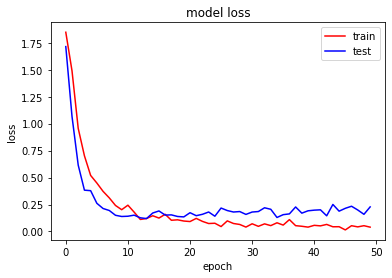

In [9]:
plt.plot(model_info.history['loss'], 'r', label='train')
plt.plot(model_info.history['val_loss'], 'b', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

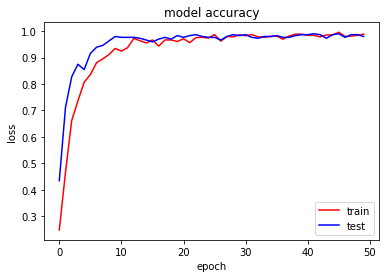

In [10]:
plt.plot(model_info.history['accuracy'], 'r', label='train')
plt.plot(model_info.history['val_accuracy'], 'b', label='test')
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [11]:
# evaluate the model
score = model.evaluate(X_train, y_train)
print('Accuracy (train): %.2f' % (score[1]*100))

score = model.evaluate(X_test, y_test)
print('Accuracy (test): %.2f' % (score[1]*100))

22/22 [==============================] - 0s 10ms/step - loss: 0.0104 - accuracy: 0.9985 - mean_squared_error: 5.9058e-04
Accuracy (train): 99.85
10/10 [==============================] - 0s 10ms/step - loss: 0.2280 - accuracy: 0.9797 - mean_squared_error: 0.0046
Accuracy (test): 97.97


(1, 48, 48, 3)
[[2.2113623e-16 7.5897276e-08 1.4700326e-14 2.4259813e-07 4.4204096e-15
  4.7754824e-08 9.9999964e-01]]
[6]
[[0. 0. 0. 0. 0. 0. 1.]]


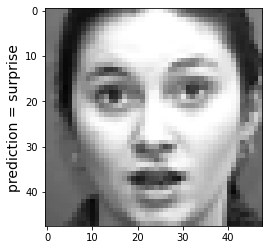

In [12]:
test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(np.argmax(model.predict(test_image), axis=-1))
print(y_test[0:1])

plt.imshow(test_image[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image), axis=-1)[0]), fontsize=14)
plt.show()

(1, 48, 48, 3)
[[0. 0. 0. 0. 0. 0. 1.]]
[6]
[[0. 0. 0. 0. 0. 0. 1.]]


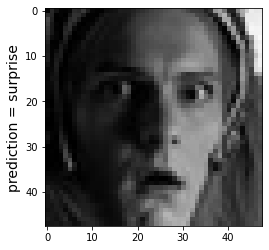

In [22]:
test_image = cv2.imread('test_images/surprise.jpg')
test_image_resize = cv2.resize(test_image,(48,48))
test_image_resize = np.reshape(test_image_resize, (1, 48, 48, 3))
print (test_image_resize.shape)

print(model.predict(test_image_resize))
print(np.argmax(model.predict(test_image_resize), axis=-1))
print(y_test[0:1])

plt.imshow(test_image_resize[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image_resize), axis=-1)[0]), fontsize=14)
plt.show()

(1, 48, 48, 3)
[[1. 0. 0. 0. 0. 0. 0.]]
[0]
[[0. 0. 0. 0. 0. 0. 1.]]


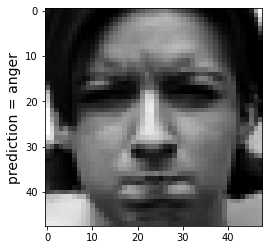

In [23]:
test_image = cv2.imread('dataset/CK+48/anger/S010_004_00000017.png')
test_image_resize = cv2.resize(test_image,(48,48))
test_image_resize = np.reshape(test_image_resize, (1, 48, 48, 3))
print (test_image_resize.shape)

print(model.predict(test_image_resize))
print(np.argmax(model.predict(test_image_resize), axis=-1))
print(y_test[0:1])

plt.imshow(test_image_resize[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image_resize), axis=-1)[0]), fontsize=14)
plt.show()

(1, 48, 48, 3)
[[1.9739401e-03 9.7439374e-07 7.5305408e-08 2.3964829e-05 1.2321302e-11
  9.9793112e-01 6.9911475e-05]]
[5]
[[0. 0. 0. 0. 0. 1. 0.]]


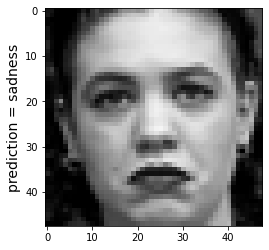

In [29]:
test_image = X_test[33:34]
print (test_image.shape)

print(model.predict(test_image))
print(np.argmax(model.predict(test_image), axis=-1))
print(y_test[33:34])

plt.imshow(test_image[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image), axis=-1)[0]), fontsize=14)
plt.show()